#### About

> Machine learning for descriptive statistics

Machine learning is a branch of artificial intelligence that deals with the development of algorithms that can learn from data and make predictions or decisions based on that data. One important aspect of machine learning is the use of statistical models, which can be used to describe and analyze data. Descriptive statistics is a branch of statistics that deals with summarizing and describing data, and machine learning techniques can be used to build descriptive statistical models.



> Linear regression

Linear regression is a popular machine learning algorithm used in descriptive statistics. It is a method for modeling the relationship between a dependent variable and one or more independent variables. The goal of linear regression is to find the line of best fit that explains the relationship between the variables. The equation for a simple linear regression model with one independent variable is:

y = b0 + b1x + bias

where y is the dependent variable, x is the independent variable, b0 and b1 are the intercept and slope coefficients, and bias is the error term. The goal of linear regression is to estimate the values of the coefficients that minimize the sum of squared errors between the predicted values and the actual values.

> Multiple Linear Regression

Multiple regression is an extension of linear regression that allows for modeling the relationship between a dependent variable and multiple independent variables. The equation for a multiple linear regression model with n independent variables is:

y = b0 + b1x1 + b2x2 + ... + bnxn + bias

where y is the dependent variable, x1, x2, ..., xn are the independent variables, b0, b1, b2, ..., bn are the intercept and slope coefficients, and bias is the error term. The goal of multiple regression is to estimate the values of the coefficients that minimize the sum of squared errors between the predicted values and the actual values.






In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
diabetes = load_diabetes()


In [8]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)


In [11]:
lr = LinearRegression().fit(X_train, y_train)


In [12]:
# Print the coefficients and intercept of the linear regression model
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)


Coefficients: [ -43.26198867 -208.66589855  593.40654802  302.89100542 -560.19094014
  261.40753499   -8.86674758  135.93174293  703.18354112   28.34977176]
Intercept: 153.06786205925664


In [13]:
# Evaluate the linear regression model on the test data
print("R^2 score:", lr.score(X_test, y_test))

R^2 score: 0.35940880381777096


> Decision Trees and Random Forests

Decision Trees and Random Forests are two popular machine learning algorithms used for both classification and regression tasks. They are based on the concept of decision trees, which can be thought of as a flowchart-like structure where each node represents a feature and each branch represents a possible value or outcome for that feature. At the end of each branch is a leaf node, which represents the final classification or regression result.

>> Decision Trees

Decision Trees use a top-down, recursive approach to divide a dataset into smaller and smaller subsets. The algorithm starts by selecting the best feature to split the dataset based on a particular criterion, such as entropy or Gini impurity. The dataset is then split into two or more subsets based on the values of that feature. This process is repeated recursively for each subset until a stopping criterion is met, such as reaching a maximum depth or a minimum number of samples per leaf node.

The final result is a tree-like structure where each internal node represents a feature and each leaf node represents a class label or regression value. To make a prediction for a new sample, the algorithm follows the path from the root to a leaf node based on the values of the features in the sample.

Mathematically, the decision tree algorithm can be represented as follows:

Given a dataset D, the goal is to partition it into subsets based on the values of the features x1, x2, ..., xn such that the resulting subsets are as homogeneous as possible with respect to the target variable y.

- Start with the entire dataset D.
- Select the best feature xk to split the dataset based on a criterion such as entropy or Gini impurity.
- Partition the dataset into subsets D1, D2, ..., Dm based on the values of xk.
- For each subset Di, repeat the above steps recursively until a stopping criterion is met.
- Assign the class label or regression value of the majority of samples in each leaf node.


>> Random Forests

Random Forests are an extension of Decision Trees that use an ensemble of multiple trees to improve performance and reduce overfitting. The algorithm works by building a set of decision trees on bootstrapped samples of the dataset, where each tree is trained on a random subset of features. The final prediction is made by averaging the predictions of all the trees.

Mathematically, the Random Forest algorithm can be represented as follows:

Given a dataset D, the goal is to build an ensemble of decision trees T1, T2, ..., Tn such that each tree Ti has high accuracy and low correlation with the other trees.

For each tree Ti in the ensemble:
- a. Sample a bootstrap subset Di from the dataset D.
- b. Select a random subset of features Fk from the total set of features.
- c. Build a decision tree Ti on the subset Di using the features Fk.
- Make a prediction for a new sample by averaging the predictions of all the trees in the ensemble.


In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus


In [16]:
iris = load_iris()
X = iris.data
y = iris.target


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Train decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# Test decision tree classifier
dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 1.0


In [20]:
# Train random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Test random forest classifier
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 1.0


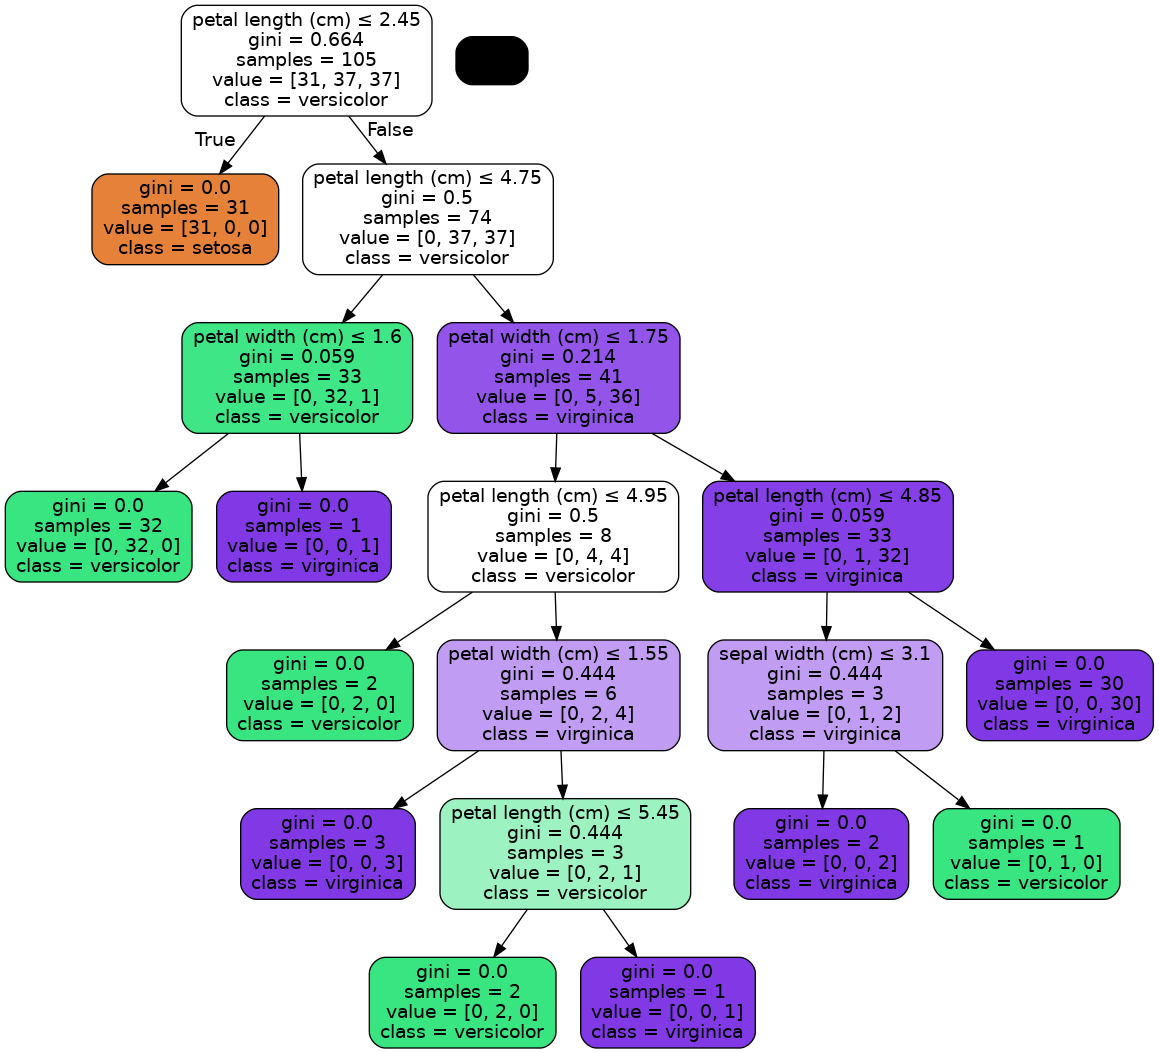

In [23]:
# Visualize decision tree
dot_data = export_graphviz(dt_clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

The mathematics behind decision trees and random forests involve concepts such as entropy, information gain, and Gini impurity for determining the splitting criteria at each node. Random forests combine multiple decision trees to reduce overfitting and improve accuracy through a process called bagging.
